In [1]:
import os
import pprint
import numpy as np
import seaborn as sns

from joblib import load
from utils import Utils
from pipeline import HsiPipeline
from hsiroutine import HsiRoutine

In [2]:
folder = '/media/koda/New Disk/Code/bacteria/atccs/gram_staining'
samples_dict = Utils.get_dict(samples=Utils.load_samples(folder))

pprint.pprint(samples_dict)

{'Bacillusscereus_14579_Plastico_B_180926-092335': [1],
 'Bacillussubtilis_6633_Plastico_B_180926-092656': [2],
 'Coryniumbacteriumglutaminum_13032_Plastico_B_180926-093210': [3],
 'Enterobacteaerogenes_13048_Plastico_B_Contaminado_180926-102747': [4],
 'Enterobactercloacal_HMFFTA_Plastico_B_180926-103027': [5],
 'Enterococcusfaecalis_29212_Plastico_B_180926-093958': [6],
 'Escherichiacoli_25922_Plastico_B_180926-102054': [7],
 'Klebsielapneumonial_700603_Plastico_B_180926-105913': [8],
 'Micrococcusluteus_9341_Plastico_B_180926-093534': [9],
 'Proteusmirabilis_9433_Plastico_B_180926-103336': [10],
 'Pseudomonasaeoruginosas_9027_Plastico_B_180926-104046': [11],
 'Salmonellaspp_10708_Plastico_B_180926-104803': [12],
 'Serratiamarcences_14765_Plastico_B_180926-105123': [13],
 'Staphylococcusaureus_25923_Plastico_B_Contaminado_180926-101712': [14],
 'Staphylococcusaureus_6538_Plastico_B_180926-101357': [15],
 'Staphylococcusepidemides_12228_Plastico_B_180926-094826': [16]}


In [4]:
samples_dict = {'Bacillusscereus_14579_Plastico_B_180926-092335': [1, 1],
 'Bacillussubtilis_6633_Plastico_B_180926-092656': [2, 1],
 'Coryniumbacteriumglutaminum_13032_Plastico_B_180926-093210': [3, 1],
 'Enterobacteaerogenes_13048_Plastico_B_Contaminado_180926-102747': [4, 2],
 'Enterobactercloacal_HMFFTA_Plastico_B_180926-103027': [5, 2],
 'Enterococcusfaecalis_29212_Plastico_B_180926-093958': [6, 1],
 'Escherichiacoli_25922_Plastico_B_180926-102054': [7, 2],
 'Klebsielapneumonial_700603_Plastico_B_180926-105913': [8, 2],
 'Micrococcusluteus_9341_Plastico_B_180926-093534': [9, 1],
 'Proteusmirabilis_9433_Plastico_B_180926-103336': [10, 2],
 'Pseudomonasaeoruginosas_9027_Plastico_B_180926-104046': [11, 2],
 'Salmonellaspp_10708_Plastico_B_180926-104803': [12, 2],
 'Serratiamarcences_14765_Plastico_B_180926-105123': [13, 2],
 'Staphylococcusaureus_25923_Plastico_B_Contaminado_180926-101712': [14, 1],
 'Staphylococcusaureus_6538_Plastico_B_180926-101357': [15, 1],
 'Staphylococcusepidemides_12228_Plastico_B_180926-094826': [16, 1]}

In [5]:
true_labels = {'gram_positiva': 1, 'gram_negativa': 2}
true_labels_rev = {1: 'Gram positive', 2: 'Gram negative'}

pipeline = HsiPipeline(data_folder=folder, samples=samples_dict)

In [8]:
pipeline.samples

{'Bacillusscereus_14579_Plastico_B_180926-092335': [1, 1],
 'Bacillussubtilis_6633_Plastico_B_180926-092656': [2, 1],
 'Coryniumbacteriumglutaminum_13032_Plastico_B_180926-093210': [3, 1],
 'Enterobacteaerogenes_13048_Plastico_B_Contaminado_180926-102747': [4, 2],
 'Enterobactercloacal_HMFFTA_Plastico_B_180926-103027': [5, 2],
 'Enterococcusfaecalis_29212_Plastico_B_180926-093958': [6, 1],
 'Escherichiacoli_25922_Plastico_B_180926-102054': [7, 2],
 'Klebsielapneumonial_700603_Plastico_B_180926-105913': [8, 2],
 'Micrococcusluteus_9341_Plastico_B_180926-093534': [9, 1],
 'Proteusmirabilis_9433_Plastico_B_180926-103336': [10, 2],
 'Pseudomonasaeoruginosas_9027_Plastico_B_180926-104046': [11, 2],
 'Salmonellaspp_10708_Plastico_B_180926-104803': [12, 2],
 'Serratiamarcences_14765_Plastico_B_180926-105123': [13, 2],
 'Staphylococcusaureus_25923_Plastico_B_Contaminado_180926-101712': [14, 1],
 'Staphylococcusaureus_6538_Plastico_B_180926-101357': [15, 1],
 'Staphylococcusepidemides_12228_Pla

In [44]:
list(pipeline.samples.keys())[4]

'Enterobactercloacal_HMFFTA_Plastico_B_180926-103027'

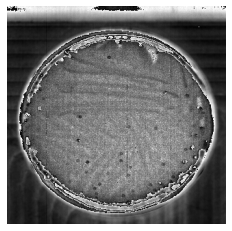

In [45]:
import matplotlib.pyplot as plt

bacteria = Utils.load_bacteria(path=pipeline.folder, name=list(pipeline.samples.keys())[4])

image = bacteria.normalized[50, :, :]
plt.imshow(pipeline.routine.rgbscale(image), cmap='gray')
plt.axis('off')
plt.savefig(os.path.join('figures_plot', 'bg_bacteria_example.jpeg'), 
            bbox_inches='tight', dpi=100)

plt.show()

In [58]:
bacteria = Utils.load_bacteria(path=pipeline.folder, name=list(pipeline.samples.keys())[4])
shape = bacteria.normalized.shape

bacteria_processed = pipeline.routine.matrix2hsi(matrix=pipeline._signal_filter(sample=bacteria),
                                                rows= shape[1], cols=shape[2])

image_processed = bacteria_processed[50, :, :]

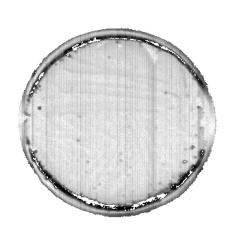

In [61]:
bacteria = Utils.load_bacteria(path=pipeline.folder, name=list(pipeline.samples.keys())[4])
image_processed = bacteria.normalized[50, :, :]

out_i = pipeline.routine.getCluster(image_processed, bacteria.sample_cluster, 0, (1, 1, 1))
plt.imshow(pipeline.routine.rgbscale(out_i))
plt.axis('off')
plt.savefig(os.path.join('figures_plot', 'sample_bacteria_example.jpeg'), 
            bbox_inches='tight', dpi=100)

plt.show()

In [6]:
mean_group_gram,target = pipeline.get_group_mean_matrix(case=0, true_labels=true_labels)

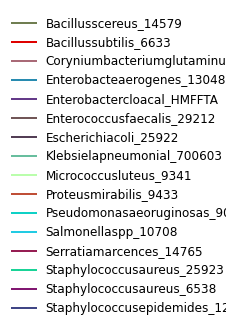

In [7]:
pipeline.plot_spectres(mean_group=mean_group_gram, 
                       true_labels=target, 
                       out_dir='figures_plot',
                       file_name='mean_spectres.jpeg')

In [6]:
mean_group_gram,target = pipeline.get_group_mean_matrix(case=0, 
                                                        true_labels=true_labels, 
                                                        process=False)

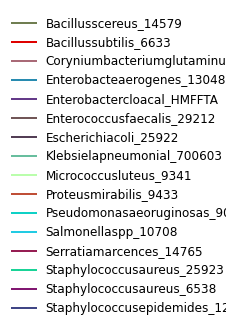

In [7]:
pipeline.plot_spectres(mean_group=mean_group_gram, 
                       true_labels=target, 
                       out_dir='figures_plot',
                       file_name='raw_spectres.jpeg')